# CSE258 HW2
## Luke Liem
## A53231779

In [114]:
from sklearn import linear_model
from sklearn.decomposition import PCA
import numpy
import random

In [26]:
f = open("5year.arff", 'r')

while not '@data' in f.readline():
    pass

dataset = []
for l in f:
    if '?' in l: # Missing entry
        continue
    l = l.split(',')
    values = [1] + [float(x) for x in l]
    values[-1] = values[-1] > 0 # Convert to bool
    dataset.append(values)

In [27]:
len(dataset)

3031

In [28]:
dataset[2]

[1,
 0.099486,
 0.59991,
 0.37489,
 1.6529,
 19.036,
 0.21084,
 0.12395,
 0.6669,
 1.0972,
 0.40009,
 0.12395,
 0.21587,
 0.082929,
 0.12395,
 1638.2,
 0.22281,
 1.6669,
 0.12395,
 0.076897,
 66.783,
 1.2422,
 0.13452,
 0.061722,
 0.2644,
 0.40009,
 0.18204,
 0.91571,
 7.3601,
 4.2136,
 0.37159,
 0.076897,
 142.66,
 2.5586,
 0.22424,
 0.13452,
 1.6118,
 25.411,
 0.42583,
 0.08346,
 0.006603,
 0.13673,
 0.08346,
 214.06,
 147.27,
 0.33734,
 1.1393,
 73.273,
 0.1248,
 0.077428,
 1.582,
 0.57417,
 0.39084,
 7.8547,
 8.3601,
 6131.0,
 0.088581,
 0.24866,
 0.91142,
 0.064344,
 5.4655,
 2.4784,
 130.02,
 2.8072,
 31.645,
 False]

In [29]:
X = [values[:-1] for values in dataset]
y = [values[-1] for values in dataset]

### Number of True Labels - 102 out of 3031 (3.36%)

In [30]:
sum(y)

102

In [31]:
model = linear_model.LogisticRegression(C=1.0)
model.fit(X, y)

predictions = model.predict(X)

/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [32]:
def calc_metrics(predictions, labels):
    # Calculate True positives, false positives, etc.

    TP_ = numpy.logical_and(predictions, labels)
    FP_ = numpy.logical_and(predictions, numpy.logical_not(labels))
    TN_ = numpy.logical_and(numpy.logical_not(predictions), numpy.logical_not(labels))
    FN_ = numpy.logical_and(numpy.logical_not(predictions), labels)

    TP=sum(TP_)
    FP=sum(FP_)
    TN=sum(TN_)
    FN=sum(FN_)
    
    return TP,FP,TN,FN

def calc_error_rates(TP, FP, TN, FN):
    # Calculate accuracy, TPR, TNR and BER
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    BER = 1.0 - (TPR+TNR)/2
    
    return accuracy, TPR, TNR, BER

In [33]:
TP,FP,TN,FN = calc_metrics(predictions,y)

print(TP,FP,TN,FN)

4 4 2925 98


## (1) Accuracy = 0.966, BER = 0.481

The model is mostly predicting Negative, as evidenced by the high TNR and very very low TPR. Doing so allows it to achieve a high classfication accuracy of 0.966, but at the expense of a high BER of 0.48.

In [34]:
accuracy, TPR, TNR, BER = calc_error_rates(TP, FP, TN, FN)

print("Accuracy: {}".format(accuracy))
print("TPR: {}".format(TPR))
print("TNR: {}".format(TNR))
print("BER: {}".format(BER))

Accuracy: 0.9663477400197954
TPR: 0.0392156862745098
TNR: 0.99863434619324
BER: 0.4810749837661251


### Shuffle the dataset

In [35]:
random.shuffle(dataset)

X = [values[:-1] for values in dataset]
y = [values[-1] for values in dataset]

N = len(dataset)
Ntrain = N*50//100  # 50-25-25 train-valid-test split
Nvalid = N*25//100 

print(N, Ntrain, Ntrain+Nvalid)

3031 1515 2272


In [36]:
Xtrain = X[:Ntrain]
Xvalid = X[Ntrain:Ntrain+Nvalid]
Xtest = X[Ntrain+Nvalid:]

ytrain = y[:Ntrain]
yvalid = y[Ntrain:Ntrain+Nvalid]
ytest = y[Ntrain+Nvalid:]

In [37]:
len(ytrain)

1515

### Train model on the training set

In [38]:
model = linear_model.LogisticRegression(C=1.0, class_weight='balanced')
model.fit(Xtrain, ytrain)


/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Number of True Labels in Training set - 53 out of 1515 (3.5%)

In [40]:
sum(ytrain)

53

## (3) Accuracy and BER of Training/Validation/Test Datasets

### Training 
Accuracy: 0.7570957095709571  
TPR: 0.7169811320754716  
TNR: 0.7585499316005472  
BER: 0.2622344681619906  

### Validation 
Accuracy: 0.7807133421400264  
TPR: 0.8461538461538461  
TNR: 0.7783857729138167  
BER: 0.18773019046616857  

### Test
Accuracy: 0.764163372859025  
TPR: 0.6521739130434783  
TNR: 0.7676630434782609  
BER: 0.2900815217391304  

In [41]:
train_pred = model.predict(Xtrain)
valid_pred = model.predict(Xvalid)
test_pred = model.predict(Xtest)

In [42]:
TP,FP,TN,FN = calc_metrics(train_pred,ytrain)
print(TP,FP,TN,FN)

accuracy, TPR, TNR, BER = calc_error_rates(TP, FP, TN, FN)

print("Accuracy: {}".format(accuracy))
print("TPR: {}".format(TPR))
print("TNR: {}".format(TNR))
print("BER: {}".format(BER))

38 353 1109 15
Accuracy: 0.7570957095709571
TPR: 0.7169811320754716
TNR: 0.7585499316005472
BER: 0.2622344681619906


In [43]:
TP,FP,TN,FN = calc_metrics(valid_pred,yvalid)
print(TP,FP,TN,FN)

accuracy, TPR, TNR, BER = calc_error_rates(TP, FP, TN, FN)

print("Accuracy: {}".format(accuracy))
print("TPR: {}".format(TPR))
print("TNR: {}".format(TNR))
print("BER: {}".format(BER))

22 162 569 4
Accuracy: 0.7807133421400264
TPR: 0.8461538461538461
TNR: 0.7783857729138167
BER: 0.18773019046616857


In [44]:
TP,FP,TN,FN = calc_metrics(test_pred,ytest)
print(TP,FP,TN,FN)

accuracy, TPR, TNR, BER = calc_error_rates(TP, FP, TN, FN)

print("Accuracy: {}".format(accuracy))
print("TPR: {}".format(TPR))
print("TNR: {}".format(TNR))
print("BER: {}".format(BER))

15 171 565 8
Accuracy: 0.764163372859025
TPR: 0.6521739130434783
TNR: 0.7676630434782609
BER: 0.2900815217391304


### Reshuffle dataset

In [58]:
random.shuffle(dataset)

X = [values[:-1] for values in dataset]
y = [values[-1] for values in dataset]

N = len(dataset)
Ntrain = N*50//100  # 50-25-25 train-valid-test split
Nvalid = N*25//100

Xtrain = X[:Ntrain]
Xvalid = X[Ntrain:Ntrain+Nvalid]
Xtest = X[Ntrain+Nvalid:]

ytrain = y[:Ntrain]
yvalid = y[Ntrain:Ntrain+Nvalid]
ytest = y[Ntrain+Nvalid:]

In [59]:
C_values = [1e-4, 1e-3, 1e-2, 1e-1, 1.0, 1e1, 1e2, 1e3, 1e4]

train_accuracies=[]
train_TPRs=[]
train_TNRs=[]
train_BERs=[]

valid_accuracies=[]
valid_TPRs=[]
valid_TNRs=[]
valid_BERs=[]

test_accuracies=[]
test_TPRs=[]
test_TNRs=[]
test_BERs=[]

for C in C_values:
    model = linear_model.LogisticRegression(C=C, class_weight='balanced')
    model.fit(Xtrain, ytrain)
    
    train_pred = model.predict(Xtrain)
    valid_pred = model.predict(Xvalid)
    test_pred = model.predict(Xtest)
    
    TP,FP,TN,FN = calc_metrics(train_pred,ytrain)
    print(TP,FP,TN,FN)

    accuracy, TPR, TNR, BER = calc_error_rates(TP, FP, TN, FN)
    
    print ("Regularization constant = {}".format(C))
    
    print ("Training")

    print("Accuracy: {}".format(accuracy))
    print("TPR: {}".format(TPR))
    print("TNR: {}".format(TNR))
    print("BER: {}".format(BER))
    
    train_accuracies.append(accuracy)
    train_TPRs.append(TPR)
    train_TNRs.append(TNR)
    train_BERs.append(BER)
    
    TP,FP,TN,FN = calc_metrics(valid_pred,yvalid)
    print(TP,FP,TN,FN)

    accuracy, TPR, TNR, BER = calc_error_rates(TP, FP, TN, FN)

    print ("Validation")

    print("Accuracy: {}".format(accuracy))
    print("TPR: {}".format(TPR))
    print("TNR: {}".format(TNR))
    print("BER: {}".format(BER))
    
    valid_accuracies.append(accuracy)
    valid_TPRs.append(TPR)
    valid_TNRs.append(TNR)
    valid_BERs.append(BER)
    
    TP,FP,TN,FN = calc_metrics(test_pred,ytest)
    print(TP,FP,TN,FN)

    accuracy, TPR, TNR, BER = calc_error_rates(TP, FP, TN, FN)
    
    print ("Test")

    print("Accuracy: {}".format(accuracy))
    print("TPR: {}".format(TPR))
    print("TNR: {}".format(TNR))
    print("BER: {}".format(BER))
    
    test_accuracies.append(accuracy)
    test_TPRs.append(TPR)
    test_TNRs.append(TNR)
    test_BERs.append(BER)
    

/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


33 329 1136 17
Regularization constant = 0.0001
Training
Accuracy: 0.7716171617161716
TPR: 0.66
TNR: 0.7754266211604095
BER: 0.2822866894197953
22 178 546 11
Validation
Accuracy: 0.750330250990753
TPR: 0.6666666666666666
TNR: 0.7541436464088398
BER: 0.28959484346224684
12 151 589 7
Test
Accuracy: 0.7918313570487484
TPR: 0.631578947368421
TNR: 0.7959459459459459
BER: 0.28623755334281653
36 306 1159 14
Regularization constant = 0.001
Training
Accuracy: 0.7887788778877888
TPR: 0.72
TNR: 0.7911262798634813
BER: 0.24443686006825938
27 169 555 6
Validation
Accuracy: 0.7688243064729194
TPR: 0.8181818181818182
TNR: 0.7665745856353591
BER: 0.20762179809141135
14 133 607 5
Test
Accuracy: 0.8181818181818182
TPR: 0.7368421052631579
TNR: 0.8202702702702702
BER: 0.22144381223328602


/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


33 309 1156 17
Regularization constant = 0.01
Training
Accuracy: 0.7848184818481848
TPR: 0.66
TNR: 0.7890784982935154
BER: 0.2754607508532423
26 168 556 7
Validation
Accuracy: 0.7688243064729194
TPR: 0.7878787878787878
TNR: 0.7679558011049724
BER: 0.22208270550811982
13 138 602 6
Test
Accuracy: 0.8102766798418972
TPR: 0.6842105263157895
TNR: 0.8135135135135135
BER: 0.2511379800853485


/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


36 305 1160 14
Regularization constant = 0.1
Training
Accuracy: 0.7894389438943894
TPR: 0.72
TNR: 0.7918088737201365
BER: 0.24409556313993175
29 165 559 4
Validation
Accuracy: 0.7767503302509907
TPR: 0.8787878787878788
TNR: 0.7720994475138122
BER: 0.1745563368491545
14 134 606 5
Test
Accuracy: 0.8168642951251647
TPR: 0.7368421052631579
TNR: 0.8189189189189189
BER: 0.22211948790896163


/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


42 339 1126 8
Regularization constant = 1.0
Training
Accuracy: 0.7709570957095709
TPR: 0.84
TNR: 0.7686006825938566
BER: 0.1956996587030717
31 194 530 2
Validation
Accuracy: 0.7410832232496698
TPR: 0.9393939393939394
TNR: 0.7320441988950276
BER: 0.16428093085551643
14 161 579 5
Test
Accuracy: 0.7812911725955204
TPR: 0.7368421052631579
TNR: 0.7824324324324324
BER: 0.24036273115220486


/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


42 341 1124 8
Regularization constant = 10.0
Training
Accuracy: 0.7696369636963697
TPR: 0.84
TNR: 0.7672354948805461
BER: 0.19638225255972697
31 196 528 2
Validation
Accuracy: 0.7384412153236459
TPR: 0.9393939393939394
TNR: 0.7292817679558011
BER: 0.16566214632512977
14 158 582 5
Test
Accuracy: 0.7852437417654808
TPR: 0.7368421052631579
TNR: 0.7864864864864864
BER: 0.2383357041251779


/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


36 311 1154 14
Regularization constant = 100.0
Training
Accuracy: 0.7854785478547854
TPR: 0.72
TNR: 0.7877133105802048
BER: 0.24614334470989763
29 169 555 4
Validation
Accuracy: 0.7714663143989432
TPR: 0.8787878787878788
TNR: 0.7665745856353591
BER: 0.17731876778838107
14 132 608 5
Test
Accuracy: 0.8194993412384717
TPR: 0.7368421052631579
TNR: 0.8216216216216217
BER: 0.22076813655761018


/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


36 314 1151 14
Regularization constant = 1000.0
Training
Accuracy: 0.7834983498349835
TPR: 0.72
TNR: 0.7856655290102389
BER: 0.24716723549488062
27 169 555 6
Validation
Accuracy: 0.7688243064729194
TPR: 0.8181818181818182
TNR: 0.7665745856353591
BER: 0.20762179809141135
14 127 613 5
Test
Accuracy: 0.8260869565217391
TPR: 0.7368421052631579
TNR: 0.8283783783783784
BER: 0.2173897581792319
36 308 1157 14
Regularization constant = 10000.0
Training
Accuracy: 0.7874587458745874
TPR: 0.72
TNR: 0.7897610921501707
BER: 0.24511945392491463
29 166 558 4
Validation
Accuracy: 0.7754293262879789
TPR: 0.8787878787878788
TNR: 0.7707182320441989
BER: 0.17524694458396117
14 134 606 5
Test
Accuracy: 0.8168642951251647
TPR: 0.7368421052631579
TNR: 0.8189189189189189
BER: 0.22211948790896163


/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## (4) Hyperparameter optimization - C=1.0

Using BER as the optimization measure, the model should be trained on the training dataset, and the model that attains the lowest BER on the validation dataset set should be selected.

In this case, C=1.0 gives us the model that attains the lowest BER on the validation dataset.

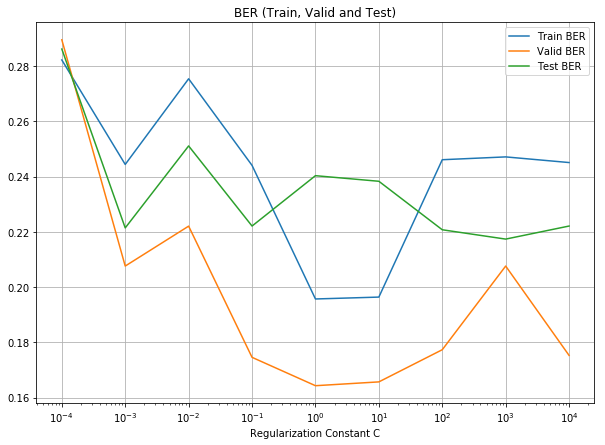

In [60]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

plt.xlabel('Regularization Constant C')
plt.title('BER (Train, Valid and Test)')
plt.grid(True)
plt.xscale('log')

plt.plot(C_values, train_BERs, label='Train BER',)
plt.plot(C_values, valid_BERs, label='Valid BER',)
plt.plot(C_values, test_BERs, label='Test BER',)

plt.legend()
plt.show()

In [73]:
random.shuffle(dataset)

X = [values[:-1] for values in dataset]
y = [values[-1] for values in dataset]

N = len(dataset)
Ntrain = N*50//100  # 50-25-25 train-valid-test split
Nvalid = N*25//100

Xtrain = X[:Ntrain]
Xvalid = X[Ntrain:Ntrain+Nvalid]
Xtest = X[Ntrain+Nvalid:]

ytrain = y[:Ntrain]
yvalid = y[Ntrain:Ntrain+Nvalid]
ytest = y[Ntrain+Nvalid:]

print (sum(ytest), sum(yvalid), sum(ytrain))

22 25 55


In [74]:
weights = [1.0] * len(ytrain)
model = linear_model.LogisticRegression(C=1, solver='lbfgs')
model.fit(Xtrain, ytrain, sample_weight=weights)

/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
# Run model on test dataset
pred = model.predict(Xtest)

# Sort labels and scores in descending order
scores = model.decision_function(Xtest)
scores_labels = list(zip(scores, ytest))
scores_labels.sort(reverse = True)

sortedlabels = [x[1] for x in scores_labels] # generate sorted labels

# retrieved, relevant and intersection
retrieved = sum(pred)  # retrieved is the # bankrupt companies in the test dataset
relevant = sum(y)   # relevant is the # bankrupt companies in the entire dataset
intersection = sum([y and p for y,p in zip(ytest,pred)])

print("Retrieved bankrupcies: {}".format(retrieved))
print("Relevant bankrupcies: {}".format(relevant))
print("Retrieved ∩ Relevant: {}".format(intersection))

# precision / recall
precision = intersection / retrieved
recall = intersection / relevant

print("Recall: {}".format(recall))
print("Precision@{}: {}".format(retrieved, precision))
print("Precision@10: {}".format(sum(sortedlabels[:10]) / 10))


Retrieved bankrupcies: 8
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 4
Recall: 0.0392156862745098
Precision@8: 0.5
Precision@10: 0.4


In [78]:
scores_labels[:10]

[(2.300410533888123, False),
 (2.1859629725027068, True),
 (2.1853039011354753, False),
 (0.4305841955890778, True),
 (0.17844269703895935, False),
 (0.1624728145489697, False),
 (0.12429876189998171, True),
 (0.004794728122243485, True),
 (-0.2679866003641622, False),
 (-0.31219950067470814, False)]

In [79]:
scores_labels[:8]

[(2.300410533888123, False),
 (2.1859629725027068, True),
 (2.1853039011354753, False),
 (0.4305841955890778, True),
 (0.17844269703895935, False),
 (0.1624728145489697, False),
 (0.12429876189998171, True),
 (0.004794728122243485, True)]

## (6) F1 Score = 0.0727, F10 Score = 0.0396 @ Sample Weight = 1.0

When all samples have the same weight, the model has precision of only 0.5 and recall of 0.0392. This means it misses most of the bankrupcies in the test dataset. And of the companies it predicts to go bankrupt, only 50% of them actually went bankrupt.

Retrieved bankrupcies: 8   
Relevant bankrupcies: 102   
Retrieved ∩ Relevant: 4   
Recall: 0.0392156862745098  
Precision@8: 0.5   
Precision@10: 0.4   

In [84]:
beta=10

F1=2*(precision*recall)/(precision+recall)  # precision is more important 
F_beta=(1+beta**2)*(precision*recall)/(precision*beta**2+recall)  # recall is more important

print("F1 score: {}".format(F1))
print("F10 score: {}".format(F_beta))

F1 score: 0.07272727272727272
F10 score: 0.03957680250783699


In [112]:
weight_values = [0.1, 0.5, 1.0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 32, 64, 80, 100, 110, 120, 130, 
                 140, 200, 256, 512, 1024]

beta=10

precisions = []
recalls = []
F1_scores = []
F10_scores = []

for w in weight_values:
    print ("\n Weight = {}".format(w))
    
    weights = [x*w if x is True else 1.0 for x in ytrain]
    model = linear_model.LogisticRegression(C=1, solver='lbfgs')
    model.fit(Xtrain, ytrain, sample_weight=weights)
    
    # Run model on test dataset
    pred = model.predict(Xtest)

    # Sort labels and scores in descending order
    scores = model.decision_function(Xtest)
    scores_labels = list(zip(scores, ytest))
    scores_labels.sort(reverse = True)

    sortedlabels = [x[1] for x in scores_labels] # generate sorted labels

    # retrieved, relevant and intersection
    retrieved = sum(pred)  # retrieved is the # bankrupt companies in the test dataset
    relevant = sum(y)   # relevant is the # bankrupt companies in the entire dataset
    intersection = sum([y and p for y,p in zip(ytest,pred)])

    print("Retrieved bankrupcies: {}".format(retrieved))
    print("Relevant bankrupcies: {}".format(relevant))
    print("Retrieved ∩ Relevant: {}".format(intersection))

    # precision / recall
    precision = intersection / retrieved
    recall = intersection / relevant

    print("Recall: {}".format(recall))
    print("Precision: {}".format(precision))
    print("Precision@10: {}".format(sum(sortedlabels[:10]) / 10))

    F1=2*(precision*recall)/(precision+recall)  # precision is more important 
    F_beta=(1+beta**2)*(precision*recall)/(precision*beta**2+recall)  # recall is more important

    print("F1 score: {}".format(F1))
    print("F10 score: {}".format(F_beta))
    
    precisions.append(precision)
    recalls.append(recall)
    F1_scores.append(F1)
    F10_scores.append(F_beta)

 


 Weight = 0.1
Retrieved bankrupcies: 1
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 0
Recall: 0.0
Precision: 0.0
Precision@10: 0.0
F1 score: nan
F10 score: nan

 Weight = 0.5
Retrieved bankrupcies: 3
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 1
Recall: 0.00980392156862745
Precision: 0.3333333333333333
Precision@10: 0.4
F1 score: 0.019047619047619046
F10 score: 0.009899049299225719

 Weight = 1.0


/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:45: RuntimeWarning: invalid value encountered in double_scalars
/home/lukeliem/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:46: RuntimeWarning: invalid value encountered in double_scalars
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Retrieved bankrupcies: 8
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 4
Recall: 0.0392156862745098
Precision: 0.5
Precision@10: 0.4
F1 score: 0.07272727272727272
F10 score: 0.03957680250783699

 Weight = 2
Retrieved bankrupcies: 10
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 4
Recall: 0.0392156862745098
Precision: 0.4
Precision@10: 0.4
F1 score: 0.07142857142857142
F10 score: 0.039569049951028404

 Weight = 4
Retrieved bankrupcies: 18
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 6
Recall: 0.058823529411764705
Precision: 0.3333333333333333
Precision@10: 0.5
F1 score: 0.1
F10 score: 0.05930710510863183

 Weight = 5


/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Retrieved bankrupcies: 25
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 7
Recall: 0.06862745098039216
Precision: 0.28
Precision@10: 0.5
F1 score: 0.11023622047244096
F10 score: 0.06914425427872861

 Weight = 6
Retrieved bankrupcies: 31
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 8
Recall: 0.0784313725490196
Precision: 0.25806451612903225
Precision@10: 0.5
F1 score: 0.12030075187969926
F10 score: 0.07897566220310821

 Weight = 7
Retrieved bankrupcies: 35
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 9
Recall: 0.08823529411764706
Precision: 0.2571428571428571
Precision@10: 0.5
F1 score: 0.13138686131386862
F10 score: 0.08881289692232536

 Weight = 8
Retrieved bankrupcies: 41
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 9
Recall: 0.08823529411764706
Precision: 0.21951219512195122
Precision@10: 0.5
F1 score: 0.1258741258741259
F10 score: 0.08876086319695342

 Weight = 9


/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Retrieved bankrupcies: 44
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 9
Recall: 0.08823529411764706
Precision: 0.20454545454545456
Precision@10: 0.5
F1 score: 0.12328767123287673
F10 score: 0.08873486919172198

 Weight = 10
Retrieved bankrupcies: 47
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 9
Recall: 0.08823529411764706
Precision: 0.19148936170212766
Precision@10: 0.5
F1 score: 0.12080536912751677
F10 score: 0.08870889040694836

 Weight = 11
Retrieved bankrupcies: 53
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 9
Recall: 0.08823529411764706
Precision: 0.16981132075471697
Precision@10: 0.5
F1 score: 0.11612903225806452
F10 score: 0.08865697844533306

 Weight = 12
Retrieved bankrupcies: 63
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 9
Recall: 0.08823529411764706
Precision: 0.14285714285714285
Precision@10: 0.5
F1 score: 0.10909090909090909
F10 score: 0.08857059339374454

 Weight = 13


/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Retrieved bankrupcies: 70
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 9
Recall: 0.08823529411764706
Precision: 0.12857142857142856
Precision@10: 0.5
F1 score: 0.10465116279069767
F10 score: 0.08851022395326193

 Weight = 14
Retrieved bankrupcies: 68
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 9
Recall: 0.08823529411764706
Precision: 0.1323529411764706
Precision@10: 0.5
F1 score: 0.10588235294117647
F10 score: 0.08852746396571873

 Weight = 15
Retrieved bankrupcies: 88
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 10
Recall: 0.09803921568627451
Precision: 0.11363636363636363
Precision@10: 0.5
F1 score: 0.10526315789473685
F10 score: 0.09817262830482115

 Weight = 16
Retrieved bankrupcies: 99
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 10
Recall: 0.09803921568627451
Precision: 0.10101010101010101
Precision@10: 0.5
F1 score: 0.09950248756218905
F10 score: 0.09806777357024955

 Weight = 32


/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Retrieved bankrupcies: 347
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 16
Recall: 0.1568627450980392
Precision: 0.04610951008645533
Precision@10: 0.5
F1 score: 0.07126948775055679
F10 score: 0.15321892481274293

 Weight = 64
Retrieved bankrupcies: 516
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 20
Recall: 0.19607843137254902
Precision: 0.03875968992248062
Precision@10: 0.5
F1 score: 0.06472491909385114
F10 score: 0.18850317282568121

 Weight = 80
Retrieved bankrupcies: 548
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 20
Recall: 0.19607843137254902
Precision: 0.0364963503649635
Precision@10: 0.5
F1 score: 0.06153846153846154
F10 score: 0.18794194268701153

 Weight = 100
Retrieved bankrupcies: 596
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 21
Recall: 0.20588235294117646
Precision: 0.03523489932885906
Precision@10: 0.5
F1 score: 0.06017191977077364
F10 score: 0.19646165246387548

 Weight = 110


/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Retrieved bankrupcies: 616
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 21
Recall: 0.20588235294117646
Precision: 0.03409090909090909
Precision@10: 0.5
F1 score: 0.0584958217270195
F10 score: 0.1960983727810651

 Weight = 120
Retrieved bankrupcies: 654
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 22
Recall: 0.21568627450980393
Precision: 0.03363914373088685
Precision@10: 0.5
F1 score: 0.058201058201058205
F10 score: 0.2047171549659112

 Weight = 130
Retrieved bankrupcies: 640
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 21
Recall: 0.20588235294117646
Precision: 0.0328125
Precision@10: 0.5
F1 score: 0.05660377358490567
F10 score: 0.19566420664206643

 Weight = 140
Retrieved bankrupcies: 632
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 21
Recall: 0.20588235294117646
Precision: 0.03322784810126582
Precision@10: 0.5
F1 score: 0.057220708446866476
F10 score: 0.1958087149187592

 Weight = 200


/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase t

Retrieved bankrupcies: 668
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 22
Recall: 0.21568627450980393
Precision: 0.03293413173652695
Precision@10: 0.5
F1 score: 0.05714285714285715
F10 score: 0.20445344129554655

 Weight = 256
Retrieved bankrupcies: 681
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 22
Recall: 0.21568627450980393
Precision: 0.032305433186490456
Precision@10: 0.5
F1 score: 0.05619412515964241
F10 score: 0.20420917195110744

 Weight = 512
Retrieved bankrupcies: 700
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 22
Recall: 0.21568627450980393
Precision: 0.03142857142857143
Precision@10: 0.5
F1 score: 0.054862842892768084
F10 score: 0.2038532110091743

 Weight = 1024
Retrieved bankrupcies: 704
Relevant bankrupcies: 102
Retrieved ∩ Relevant: 22
Recall: 0.21568627450980393
Precision: 0.03125
Precision@10: 0.5
F1 score: 0.05459057071960298
F10 score: 0.2037784299339692


/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## (6) Optimal F1 Score = 0.131 @ W = 7; Optimal F10 Score = 0.2047 @ W = 120

F10 score is highest at sample_weight=120, where the model caught all 22 bankrupcies in the test dataset. But this is accomplished by the model predicting mostly bankrupcies (654 out of 759 instances).

 Weight = 120    
Retrieved bankrupcies: 654  
Relevant bankrupcies: 102  
Retrieved ∩ Relevant: 22  
Recall: 0.21568627450980393  
Precision: 0.03363914373088685  
Precision@10: 0.5  
F1 score: 0.058201058201058205  
**F10 score: 0.2047171549659112**  

F1 score is highest at sample_weight=7, when it predicted 35 bankrupcies of which only 9 (25.7%) actually took place.  

Retrieved bankrupcies: 35  
Relevant bankrupcies: 102  
Retrieved ∩ Relevant: 9  
Recall: 0.08823529411764706  
Precision: 0.2571428571428571    
Precision@10: 0.5  
**F1 score: 0.13138686131386862**  
F10 score: 0.08881289692232536  



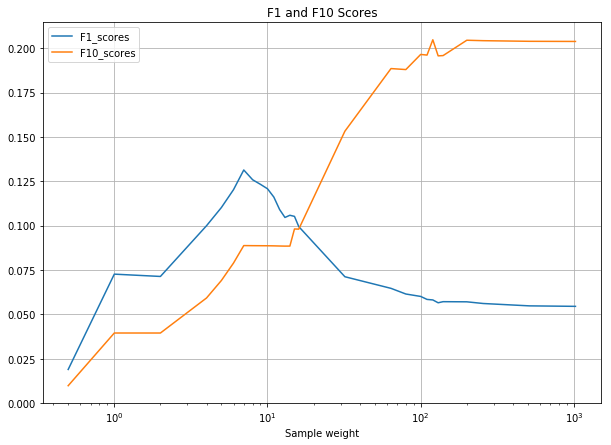

In [113]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

plt.xlabel('Sample weight')
plt.title('F1 and F10 Scores')
plt.grid(True)
plt.xscale('log')

plt.plot(weight_values, F1_scores, label='F1_scores',)
plt.plot(weight_values, F10_scores, label='F10_scores',)

plt.legend()
plt.show()

## (7) First PCA component

In [126]:
pca = PCA(n_components=5)
pca.fit(Xtrain)

print(pca.components_.shape)
print(pca.components_[0])

(5, 65)
[ 1.03892808e-29  1.91960153e-07 -8.34428898e-07  9.74534682e-07
  4.89595216e-06  2.04801189e-03  7.44527917e-07  2.21813194e-07
  5.96258730e-06 -5.49777226e-07  7.82939397e-07  1.85033076e-07
  1.15710485e-06 -4.57462650e-06  2.21494128e-07 -3.61918196e-03
  1.09287735e-06  6.50973463e-06  1.04222929e-07  4.72934000e-07
  3.19143807e-05 -1.17427546e-08  1.56926509e-07  4.43411571e-07
  6.09877164e-07  9.93907480e-07  9.52155719e-07 -5.06026046e-05
  2.36879437e-05  3.46616851e-06 -1.93460665e-06  4.58144820e-07
 -3.86871414e-04  3.98980802e-06 -1.45222884e-06  1.30870345e-07
 -5.61830338e-07  1.05446040e-03  6.41271473e-07  1.89753406e-07
  2.45581404e-06  1.65800551e-07  3.20951506e-07  4.56861735e-05
  1.37697374e-05 -1.02555054e-06  3.74147343e-06 -4.46147010e-05
  1.93156977e-07  4.64493749e-07  4.68914839e-06 -6.53042652e-07
 -1.02631067e-06 -3.55160892e-06  2.37098199e-05  9.99990688e-01
  2.06368882e-07 -1.60384844e-07 -2.87356300e-07 -1.08864430e-07
 -7.45175094e-05 

In [127]:
# Rotate the datasets
Xpca_train = numpy.matmul(Xtrain, pca.components_.T)
Xpca_valid = numpy.matmul(Xvalid, pca.components_.T)
Xpca_test = numpy.matmul(Xtest, pca.components_.T)

In [128]:
model = linear_model.LogisticRegression(C=1.0, class_weight='balanced')
model.fit(Xpca_train, ytrain)

/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
N_values = [5,10,15,20,25,30,35,40,45,50,55,60,65]

train_accuracies=[]
train_TPRs=[]
train_TNRs=[]
train_BERs=[]

valid_accuracies=[]
valid_TPRs=[]
valid_TNRs=[]
valid_BERs=[]

test_accuracies=[]
test_TPRs=[]
test_TNRs=[]
test_BERs=[]

for N in N_values:
    
    print ("\n # PCA Components = {}".format(N))
    # Set PCA n_components
    pca = PCA(n_components=N)
    pca.fit(Xtrain)
    
    # Rotate the datasets
    Xpca_train = numpy.matmul(Xtrain, pca.components_.T)
    Xpca_valid = numpy.matmul(Xvalid, pca.components_.T)
    Xpca_test = numpy.matmul(Xtest, pca.components_.T)
    
    model = linear_model.LogisticRegression(C=1.0, class_weight='balanced')
    model.fit(Xpca_train, ytrain)
    
    train_pred = model.predict(Xpca_train)
    valid_pred = model.predict(Xpca_valid)
    test_pred = model.predict(Xpca_test)
    
    print ("Training")
    TP,FP,TN,FN = calc_metrics(train_pred,ytrain)
    print(TP,FP,TN,FN)

    accuracy, TPR, TNR, BER = calc_error_rates(TP, FP, TN, FN)
    print("Accuracy: {}".format(accuracy))
    print("TPR: {}".format(TPR))
    print("TNR: {}".format(TNR))
    print("BER: {}".format(BER))
    
    train_accuracies.append(accuracy)
    train_TPRs.append(TPR)
    train_TNRs.append(TNR)
    train_BERs.append(BER)

    print ("Validation")
    TP,FP,TN,FN = calc_metrics(valid_pred,yvalid)
    print(TP,FP,TN,FN)

    accuracy, TPR, TNR, BER = calc_error_rates(TP, FP, TN, FN)
    print("Accuracy: {}".format(accuracy))
    print("TPR: {}".format(TPR))
    print("TNR: {}".format(TNR))
    print("BER: {}".format(BER))
    
    valid_accuracies.append(accuracy)
    valid_TPRs.append(TPR)
    valid_TNRs.append(TNR)
    valid_BERs.append(BER)
    
    print ("Test")
    TP,FP,TN,FN = calc_metrics(test_pred,ytest)
    print(TP,FP,TN,FN)

    accuracy, TPR, TNR, BER = calc_error_rates(TP, FP, TN, FN)
    print("Accuracy: {}".format(accuracy))
    print("TPR: {}".format(TPR))
    print("TNR: {}".format(TNR))
    print("BER: {}".format(BER))
    
    test_accuracies.append(accuracy)
    test_TPRs.append(TPR)
    test_TNRs.append(TNR)
    test_BERs.append(BER)
    


 # PCA Components = 5
Training
47 710 750 8
Accuracy: 0.526072607260726
TPR: 0.8545454545454545
TNR: 0.5136986301369864
BER: 0.3158779576587796
Validation
20 353 379 5
Accuracy: 0.5270805812417437
TPR: 0.8
TNR: 0.51775956284153
BER: 0.341120218579235
Test
19 354 383 3
Accuracy: 0.5296442687747036
TPR: 0.8636363636363636
TNR: 0.519674355495251
BER: 0.30834464043419274

 # PCA Components = 10
Training
35 445 1015 20
Accuracy: 0.693069306930693
TPR: 0.6363636363636364
TNR: 0.6952054794520548
BER: 0.33421544209215437
Validation
11 209 523 14
Accuracy: 0.7054161162483488
TPR: 0.44
TNR: 0.7144808743169399
BER: 0.42275956284153005
Test
13 239 498 9
Accuracy: 0.6732542819499341
TPR: 0.5909090909090909
TNR: 0.6757123473541384
BER: 0.36668928086838526

 # PCA Components = 15


/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be chan

Training
39 372 1088 16
Accuracy: 0.7438943894389439
TPR: 0.7090909090909091
TNR: 0.7452054794520548
BER: 0.2728518057285181
Validation
16 193 539 9
Accuracy: 0.7331571994715984
TPR: 0.64
TNR: 0.7363387978142076
BER: 0.3118306010928962
Test
14 212 525 8
Accuracy: 0.7101449275362319
TPR: 0.6363636363636364
TNR: 0.7123473541383989
BER: 0.32564450474898243

 # PCA Components = 20
Training
39 325 1135 16
Accuracy: 0.7749174917491749
TPR: 0.7090909090909091
TNR: 0.7773972602739726
BER: 0.25675591531755915
Validation
18 175 557 7
Accuracy: 0.7595772787318362
TPR: 0.72
TNR: 0.7609289617486339
BER: 0.25953551912568307
Test
13 192 545 9
Accuracy: 0.7351778656126482
TPR: 0.5909090909090909
TNR: 0.7394843962008141
BER: 0.3348032564450475

 # PCA Components = 25


/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training
39 321 1139 16
Accuracy: 0.7775577557755775
TPR: 0.7090909090909091
TNR: 0.7801369863013699
BER: 0.25538605230386047
Validation
18 156 576 7
Accuracy: 0.7846763540290621
TPR: 0.72
TNR: 0.7868852459016393
BER: 0.24655737704918035
Test
15 189 548 7
Accuracy: 0.7417654808959157
TPR: 0.6818181818181818
TNR: 0.7435549525101763
BER: 0.2873134328358209

 # PCA Components = 30
Training
39 336 1124 16
Accuracy: 0.7676567656765677
TPR: 0.7090909090909091
TNR: 0.7698630136986301
BER: 0.2605230386052304
Validation
18 172 560 7
Accuracy: 0.7635402906208718
TPR: 0.72
TNR: 0.7650273224043715
BER: 0.25748633879781424
Test
14 202 535 8
Accuracy: 0.7233201581027668
TPR: 0.6363636363636364
TNR: 0.7259158751696065
BER: 0.31886024423337855

 # PCA Components = 35


/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training
40 308 1152 15
Accuracy: 0.7867986798679868
TPR: 0.7272727272727273
TNR: 0.7890410958904109
BER: 0.24184308841843083
Validation
19 150 582 6
Accuracy: 0.7939233817701453
TPR: 0.76
TNR: 0.7950819672131147
BER: 0.22245901639344257
Test
16 172 565 6
Accuracy: 0.7654808959156785
TPR: 0.7272727272727273
TNR: 0.7666214382632293
BER: 0.2530529172320217

 # PCA Components = 40
Training


/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


40 312 1148 15
Accuracy: 0.7841584158415842
TPR: 0.7272727272727273
TNR: 0.7863013698630137
BER: 0.2432129514321295
Validation
18 158 574 7
Accuracy: 0.7820343461030383
TPR: 0.72
TNR: 0.7841530054644809
BER: 0.24792349726775953
Test
15 190 547 7
Accuracy: 0.7404479578392622
TPR: 0.6818181818181818
TNR: 0.7421981004070556
BER: 0.2879918588873813

 # PCA Components = 45


/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training
40 304 1156 15
Accuracy: 0.7894389438943894
TPR: 0.7272727272727273
TNR: 0.7917808219178082
BER: 0.24047322540473226
Validation
18 148 584 7
Accuracy: 0.7952443857331571
TPR: 0.72
TNR: 0.7978142076502732
BER: 0.2410928961748634
Test
15 177 560 7
Accuracy: 0.7575757575757576
TPR: 0.6818181818181818
TNR: 0.7598371777476255
BER: 0.27917232021709637

 # PCA Components = 50


/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training
40 319 1141 15
Accuracy: 0.7795379537953795
TPR: 0.7272727272727273
TNR: 0.7815068493150685
BER: 0.2456102117061021
Validation
18 163 569 7
Accuracy: 0.7754293262879789
TPR: 0.72
TNR: 0.7773224043715847
BER: 0.25133879781420765
Test
14 193 544 8
Accuracy: 0.7351778656126482
TPR: 0.6363636363636364
TNR: 0.7381275440976933
BER: 0.3127544097693351

 # PCA Components = 55


/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training
41 334 1126 14
Accuracy: 0.7702970297029703
TPR: 0.7454545454545455
TNR: 0.7712328767123288
BER: 0.24165628891656288
Validation
18 169 563 7
Accuracy: 0.7675033025099075
TPR: 0.72
TNR: 0.7691256830601093
BER: 0.2554371584699453
Test
15 198 539 7
Accuracy: 0.7299077733860343
TPR: 0.6818181818181818
TNR: 0.7313432835820896
BER: 0.29341926729986434

 # PCA Components = 60


/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training
40 319 1141 15
Accuracy: 0.7795379537953795
TPR: 0.7272727272727273
TNR: 0.7815068493150685
BER: 0.2456102117061021
Validation
18 160 572 7
Accuracy: 0.7793923381770145
TPR: 0.72
TNR: 0.7814207650273224
BER: 0.24928961748633882
Test
14 190 547 8
Accuracy: 0.7391304347826086
TPR: 0.6363636363636364
TNR: 0.7421981004070556
BER: 0.31071913161465403

 # PCA Components = 65
Training
40 294 1166 15
Accuracy: 0.7960396039603961
TPR: 0.7272727272727273
TNR: 0.7986301369863014
BER: 0.23704856787048567
Validation
18 141 591 7
Accuracy: 0.8044914134742405
TPR: 0.72
TNR: 0.8073770491803278
BER: 0.2363114754098361
Test
15 165 572 7
Accuracy: 0.7733860342555995
TPR: 0.6818181818181818
TNR: 0.7761194029850746
BER: 0.27103120759837185


/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## (8) Validation and Test BER of a model using first N PCA components

Hyperparameter search on N={5,10,.., 65}. The optimal BER is achieved when N=35.

In [142]:
print(valid_BERs)

[0.341120218579235, 0.42275956284153005, 0.3118306010928962, 0.25953551912568307, 0.24655737704918035, 0.25748633879781424, 0.22245901639344257, 0.24792349726775953, 0.2410928961748634, 0.25133879781420765, 0.2554371584699453, 0.24928961748633882, 0.2363114754098361]


In [139]:
print(test_BERs)

[0.30834464043419274, 0.39382632293080055, 0.33649932157394846, 0.32666214382632286, 0.31614654002713705, 0.31071913161465403, 0.2523744911804613, 0.24898236092265935]


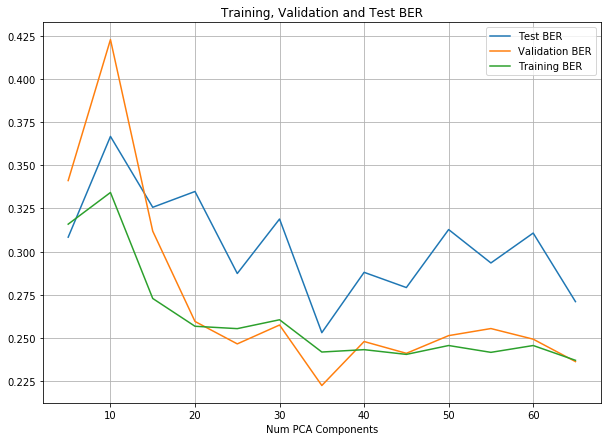

In [143]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

plt.xlabel('Num PCA Components')
plt.title('Training, Validation and Test BER')
plt.grid(True)

plt.plot(N_values, test_BERs, label='Test BER')
plt.plot(N_values, valid_BERs, label='Validation BER')
plt.plot(N_values, train_BERs, label='Training BER')

plt.legend()
plt.show()